In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [14]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [15]:
#!pip3 install pickle5
#import pickle5 as pickle

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
#!ls "/content/drive/MyDrive/Colab Notebooks/Innoprojekt/"

In [18]:
#with open('/content/drive/MyDrive/Colab Notebooks/Innoprojekt/preprocessed_coffee.pickle', 'rb') as handle:
 #   df = pickle.load(handle)

In [19]:
df.head()

,time,x,y,z,day_number,day_name,Status
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag,0
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag,0
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag,0
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag,0
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag,0


In [20]:
df.head()

,time,x,y,z,day_number,day_name,Status
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag,0
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag,0
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag,0
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag,0
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag,0


In [21]:
df.quantile(0.99)

x             0.359
y             0.090
z             4.307
day_number    6.000
Status        0.000
Name: 0.99, dtype: float64

In [22]:
df.quantile(1 - 0.99)

x             0.171
y            -0.008
z             4.234
day_number    0.000
Status        0.000
Name: 0.010000000000000009, dtype: float64

In [23]:
df.describe().round(3)

,x,y,z,day_number,Status
count,5604986.000,5604986.000,5604986.000,5604986.000,5604986.0
mean,0.256,0.047,4.271,3.007,0.0
std,0.049,0.033,0.038,2.142,0.0
min,-4.632,-3.072,-3.996,0.000,0.0
25%,0.223,0.034,4.260,1.000,0.0
50%,0.249,0.049,4.270,3.000,0.0
75%,0.291,0.062,4.281,5.000,0.0
max,3.341,3.183,8.191,6.000,0.0


In [24]:
# Labeln der Daten notwendig, um Modell zu trainieren...
# 1. Versuch mit Hilfe eines Moving Average
# Je nach Durchschnittswert einer der drei Klassen mit One Hot encoding zuordnen
# Problem: ist der Durchschnittswert konstant oder unterschiedlich, wenn Kaffee gemacht wird

# die ganze Idee macht keinen Sinn, da Moving Average immer bei ca. 1,5...
# man braucht andere Metrik als den Mittelwert. Eventuell einfach zählen, wie oft Wert von x, y, z in einem Abschnitt hoch bzw. niedrig ist


intersection = 2036476 - 5791

print(intersection + 5791)

offset = 120
one_part = df[intersection-350 : intersection]
#avg = (np.mean(one_part.x) + np.mean(one_part.y) + np.mean(one_part.z)) / 3
count_small = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
        (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
        (one_part[(one_part.z > 2) | (one_part.z < -2)].count()[0])
count_big = (one_part[(one_part.x > 20) | (one_part.x < -20)].count()[0]) + \
                (one_part[(one_part.y > 20) | (one_part.y < -20)].count()[0]) + \
                (one_part[(one_part.z > 20) | (one_part.z < -20)].count()[0])



print(count_small, count_big)
# Leerlauf: 0, 0
# Tisch: 32, 4
# Kaffee: 413, 99
# Kaffee & Wasser: 494, 135

2036476
350 0


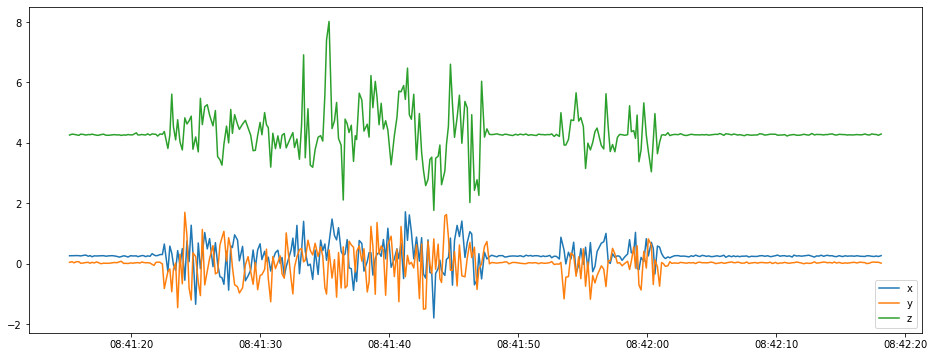

In [25]:
# Ausschnitt, bei dem Kaffee gemacht wird und Wasser nachgezogen wird
intersection = 1460000 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

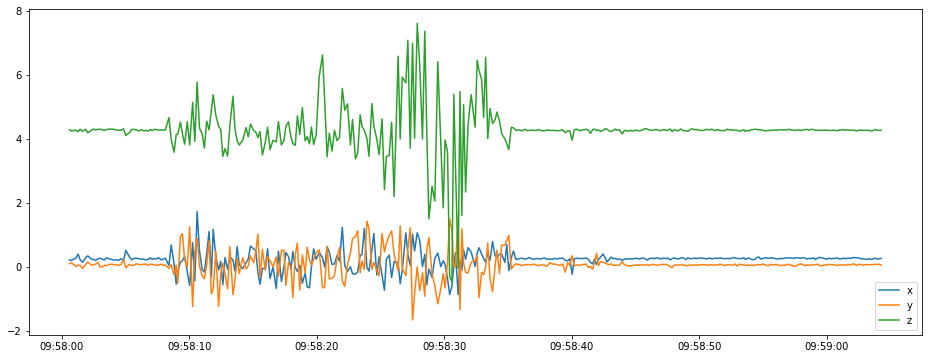

In [26]:
# Ausschnitt, wo Kaffee gemacht wird
intersection = 1486400 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

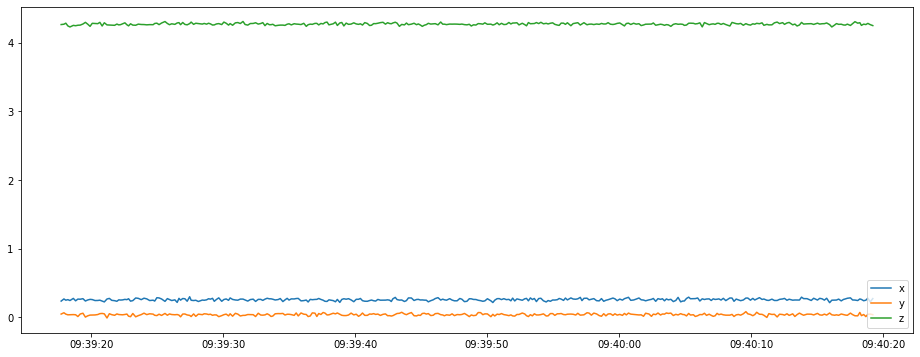

In [27]:
# Ausschnitt Leerlauf
intersection = 1480000 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

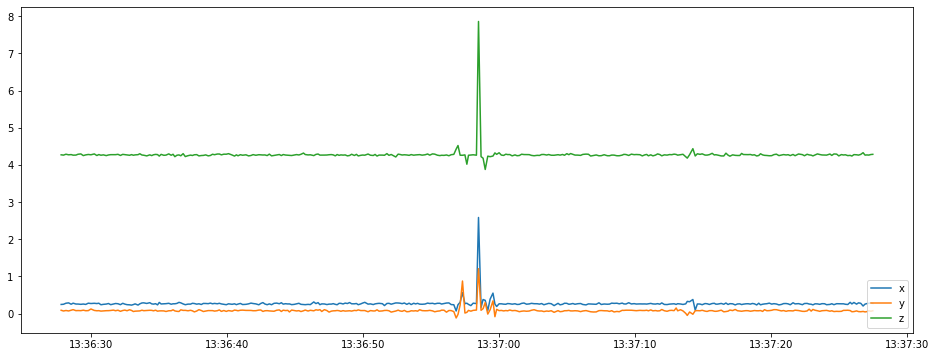

In [28]:
# Ausschnitt mit irrelevantem Zustand
intersection = 1558600 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

In [29]:
intersection = 350

while intersection < len(df):
    offset = 0
    intersection_value = (df.x[intersection] + df.y[intersection] + df.z[intersection]) / 3
    if (intersection_value > 1.48 or intersection_value < 1.54):
        one_part = df[intersection-350 : intersection]
        #avg = (np.mean(one_part.x) + np.mean(one_part.y) + np.mean(one_part.z)) / 3
        count_small = (one_part[(one_part.x > 0.359) | (one_part.x < 0.171)].count()[0]) + \
                (one_part[(one_part.y > 0.090) | (one_part.y < -0.008)].count()[0]) + \
                (one_part[(one_part.z > 4.307) | (one_part.z < 4.234)].count()[0])
        count_big = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                (one_part[(one_part.z > 8) | (one_part.z < 0)].count()[0])
        
        if (count_small < 100 and count_big < 1):
            df.Status[intersection-350:intersection] = 0    # Leerlauf
        elif (count_small < 100 and count_big >= 1):
            df.Status[intersection-350:intersection] = 1    # undefiniert (ein hoher Ausschlag)
        elif (count_small < 400):
            df.Status[intersection-350:intersection] = 2    # Kaffee ausgeben
        elif (count_small >= 400):
            df.Status[intersection-350:intersection] = 3    # Kaffee ausgeben und Wasser nachziehen

        intersection += 350
    else:  
        while (intersection_value <= 1.48 or intersection_value >= 1.54):
            offset += 60 
            intersection_value = (df.x[intersection+offset] + df.y[intersection+offset] + df.z[intersection+offset]) / 3 
            if (intersection_value > 1.48 or intersection_value < 1.54):
                
                    
                one_part = df[intersection-350:intersection+offset]
                #hier muss noch beachtet werden, dass die Länge des Abschnitts größer ist. Dadurch gibt es auch mehr Ausschläge.
                count_small = (one_part[(one_part.x > 0.359) | (one_part.x < 0.171)].count()[0]) + \
                        (one_part[(one_part.y > 0.090) | (one_part.y < -0.008)].count()[0]) + \
                        (one_part[(one_part.z > 4.307) | (one_part.z < 4.234)].count()[0])
                count_big = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                        (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                        (one_part[(one_part.z > 8) | (one_part.z < 0)].count()[0])
                
                if (count_small < 100 and count_big < 1):
                    df.Status[intersection-350:intersection+offset] = 0
                elif (count_small < 100  and count_big >= 1):
                    df.Status[intersection-350:intersection+offset] = 1
                elif (count_small < 400):
                    df.Status[intersection-350:intersection+offset] = 2
                elif (count_small >= 400):
                    df.Status[intersection-350:intersection+offset] = 3

                intersection += 350 + offset
  

C:\Users\pauls\AppData\Local\Temp/ipykernel_16320/1044542527.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[intersection-350:intersection] = 0    # Leerlauf
C:\Users\pauls\AppData\Local\Temp/ipykernel_16320/1044542527.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[intersection-350:intersection] = 3    # Kaffee ausgeben und Wasser nachziehen
C:\Users\pauls\AppData\Local\Temp/ipykernel_16320/1044542527.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
for i in range(1486000 - 5791, 1486400 - 5791):
    intersection_value = (df.x[i] + df.y[i] + df.z[i]) / 3
    print(intersection_value)

0.39245587837602774
-0.15350954315911294
-0.03127564034333563
0.3517997128190498
-0.041123362486094266
-0.30239887472572763
-0.07152277627469517
0.1624133638055072
0.34661725353759065
0.3402795683142929
-0.2694148848802201
-0.020751830364092328
-0.3342435119675109
-0.10154639642283242
-0.08443797905794763
0.24554381376751974
0.7161118962035081
0.6588888376798431
0.2895566622203352
0.27367808844471103
0.036075775575838596
0.1990338680025063
0.17444039885778606
0.1952629643924416
-0.25794067720252456
0.014717335622475866
-0.2315114846195254
0.5637056687637837
0.40063912434611765
0.08653694341863616
0.21101989208150237
0.6122662869575685
0.036824768011396884
-0.10736422454718093
0.5002725694423079
0.19828880098905
0.24260563342324368
0.35433945460680955
-0.36249846999029717
0.20941240567438382
0.293100366921577
1.0096623587402889
0.14779392767377927
0.6027505246177945
-0.20704732764004585
0.17344215797726273
-0.10600275012798221
0.23518916338654525
-0.0565743816349972
0.36437239432620716


In [ ]:
df.head()

,time,x,y,z,day_number,day_name,Status
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag,0
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag,0
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag,0
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag,0
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag,0


In [ ]:
leerlauf = df[df.Status == 0]
undefiniert = df[df.Status == 1]
kaffee = df[df.Status == 2]
kaffee_und_wasser = df[df.Status == 3]

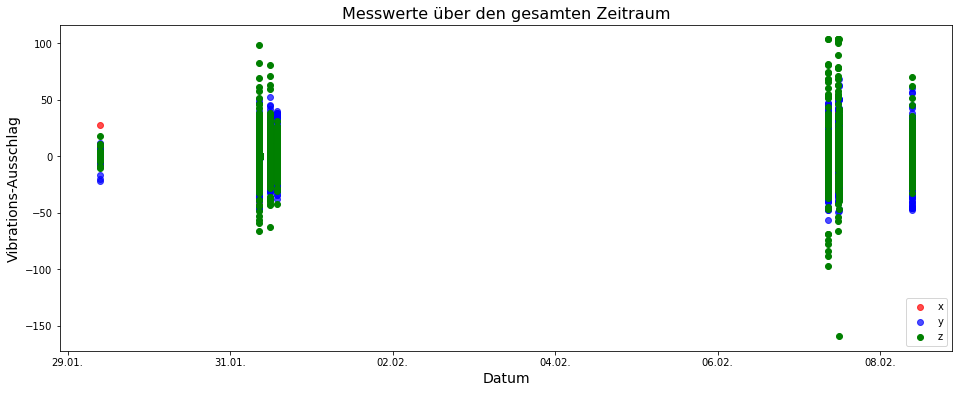

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.x, color='red', label='x', alpha=0.7)
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.y, color='blue', label='y', alpha=0.7)
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.z, color='green', label='z')

plt.legend(loc=4)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
ax.set_title("Messwerte über den gesamten Zeitraum", fontsize=16)  

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

In [ ]:
a = df['time'][100000] - df['time'][0]

In [ ]:
a < timedelta(days=0, hours=5)

False

In [ ]:
kaffee_und_wasser

,time,day_number,day_name,x,y,z,Status
467950,2022-01-29 09:38:33.636,5,Samstag,2.037049,3.098972,-0.331649,3
467951,2022-01-29 09:38:33.854,5,Samstag,2.242656,2.613331,-0.727126,3
467952,2022-01-29 09:38:34.004,5,Samstag,2.694992,2.097338,-0.463479,3
467953,2022-01-29 09:38:34.176,5,Samstag,2.592188,2.279453,-0.358012,3
467954,2022-01-29 09:38:34.341,5,Samstag,2.674432,3.098972,-0.173456,3
...,...,...,...,...,...,...,...
5038945,2022-02-08 09:20:17.872,1,Dienstag,-1.561079,0.003011,0.670236,3
5038946,2022-02-08 09:20:18.021,1,Dienstag,-1.663882,0.549357,-0.410739,3
5038947,2022-02-08 09:20:18.164,1,Dienstag,-1.293789,0.185127,0.380214,3
5038948,2022-02-08 09:20:18.322,1,Dienstag,-1.581639,-0.179104,-0.015263,3


In [ ]:
kaffee_und_wasser['time'][0:1]

350   2022-01-28 10:40:41.597
Name: time, dtype: datetime64[ns]

In [ ]:
kaffee_und_wasser.reset_index(inplace=True, drop=True)

In [ ]:
kaffee_und_wasser['time'].iloc[1] - kaffee_und_wasser['time'].iloc[0] 

Timedelta('0 days 00:00:00.173000')

In [ ]:
len(kaffee_und_wasser)

21350

In [ ]:
for i in kaffee_und_wasser.items():
    print(i)

('time', 0       2022-01-28 10:40:41.597
1       2022-01-28 10:40:41.770
2       2022-01-28 10:40:41.965
3       2022-01-28 10:40:42.137
4       2022-01-28 10:40:42.355
                  ...          
21345   2022-02-09 13:45:06.451
21346   2022-02-09 13:45:06.631
21347   2022-02-09 13:45:06.811
21348   2022-02-09 13:45:06.946
21349   2022-02-09 13:45:07.133
Name: time, Length: 21350, dtype: datetime64[ns])
('x', 0        0.266
1        0.261
2        0.253
3        0.230
4        0.232
         ...  
21345    0.222
21346    0.214
21347    0.261
21348    0.236
21349    0.202
Name: x, Length: 21350, dtype: float64)
('y', 0        0.084
1        0.057
2        0.065
3        0.073
4        0.081
         ...  
21345    0.023
21346    0.014
21347    0.018
21348    0.000
21349    0.024
Name: y, Length: 21350, dtype: float64)
('z', 0        4.248
1        4.248
2        4.279
3        4.293
4        4.287
         ...  
21345    4.267
21346    4.279
21347    4.255
21348    4.265
21349    4.

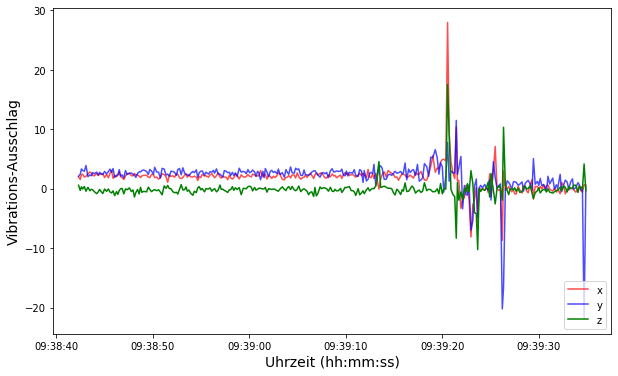

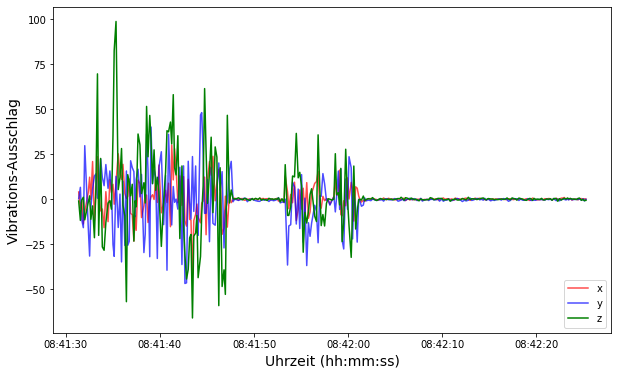

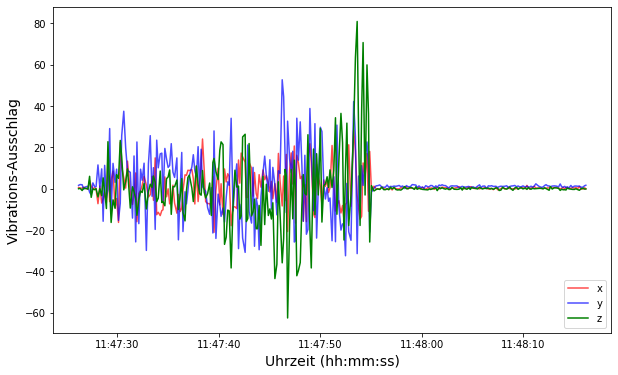

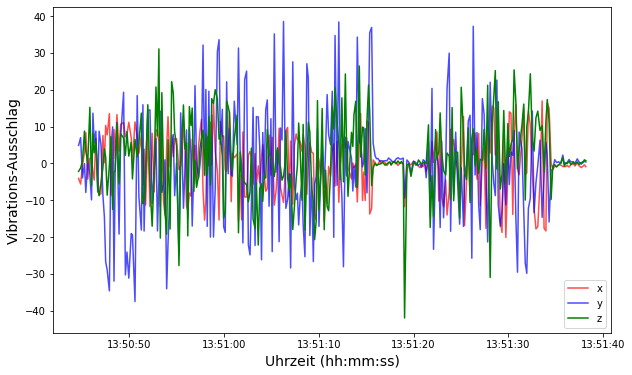

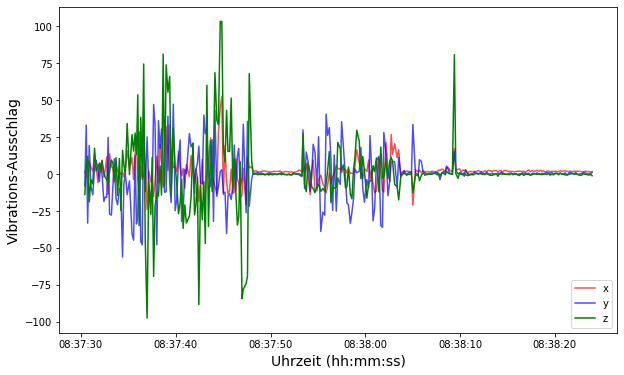

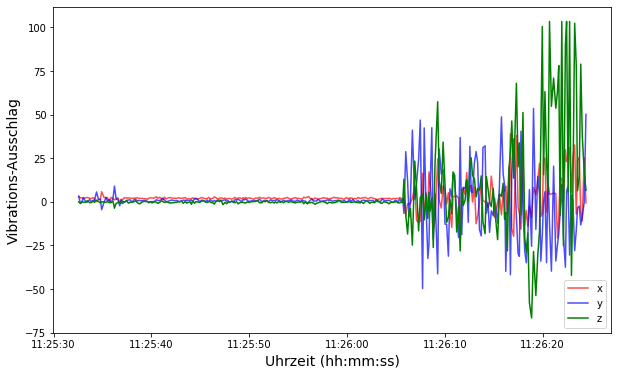

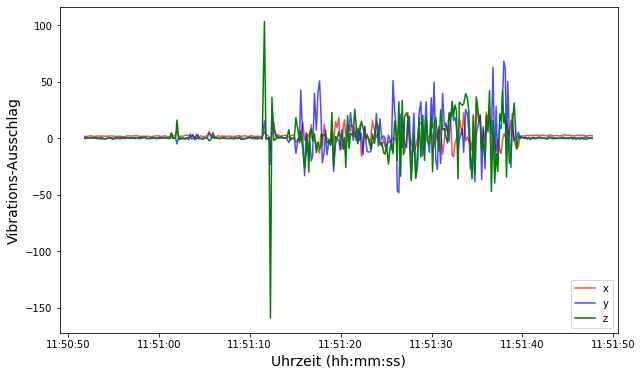

In [ ]:
for index, elem in enumerate(kaffee_und_wasser.iterrows()):
    if (index+1 < len(kaffee_und_wasser) and index - 1 >= 0):
        prev_time = kaffee_und_wasser['time'][index-1]
        curr_time = kaffee_und_wasser['time'][index]

        delta = curr_time - prev_time

        if (delta > timedelta(minutes=2)):
            fig, ax = plt.subplots(figsize=(10,6))
            ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.x[index - 300: index], color='red', label='x', alpha=0.7)
            ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.y[index - 300: index], color='blue', label='y', alpha=0.7)
            ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.z[index - 300: index], color='green', label='z')

            plt.legend(loc=4)
            ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
            ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

In [ ]:
X = df[['x','y','z']]
y = df[['Status']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
# importing classifier
from sklearn.naive_bayes import GaussianNB

# initializaing the NB
classifer = GaussianNB()

# training the model
classifer.fit(X_train, y_train)

# testing the model
y_pred = classifer.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.953712657368758


In [ ]:
# Der Score ist gut
# ABER: Die Labels wurden mit einfachen Funktion und nicht per Hand gemacht. Das heißt schon da können Fehler auftreten
# Außerdem ist bestimmt zu 95% der Zeit oder mehr die Maschine im Leerlauf. Das heißt, wenn Modell immer Leerlauf vorhersagt, hat man schon eine Genauigkeit von 95%

In [ ]:
y_test

,Status
5005468,0
1853282,0
1212186,0
3255198,0
2460041,0
...,...
4740026,2
670614,0
1447641,0
5128345,0


In [ ]:
y_test['predict'] = y_pred
wrong_pred = y_test[y_test.Status != y_test.predict]

In [ ]:
wrong_pred

,Status,predict
4696543,2,0
4730699,2,0
4736697,2,0
2886076,2,0
4662709,2,0
...,...,...
2886953,2,0
4773613,2,0
4750066,2,0
4752724,2,0


In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1396035, 2: 3470, 3: 1742}

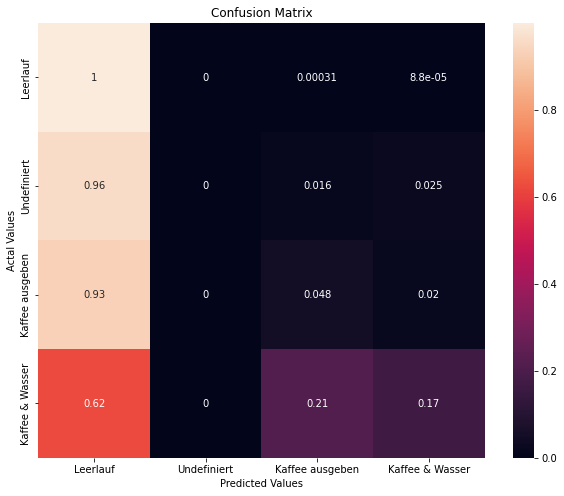

In [ ]:
from sklearn.metrics import confusion_matrix

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# In Prozent:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Leerlauf','Undefiniert','Kaffee ausgeben', 'Kaffee & Wasser'], 
                     columns = ['Leerlauf','Undefiniert','Kaffee ausgeben', 'Kaffee & Wasser'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()